## Importações

In [149]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import keras
from keras import layers

import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

pd.options.display.max_columns = None

## Ler Dados

### CSV

In [150]:
df = pd.read_csv('../data/arquivo_fe.csv')
df.shape

(299999, 23)

In [151]:
df.head()

,startingAirport,destinationAirport,elapsedDays,seatsRemaining,searchDateInDays,flightDateInDays,segment1AirlineName,segment2AirlineName,segment3AirlineName,segment4AirlineName,segment1CabinCode,segment2CabinCode,segment3CabinCode,segment4CabinCode,segment1EquipmentDescription,segment2EquipmentDescription,segment3EquipmentDescription,segment4EquipmentDescription,daysDifferenceBetweenSearchAndFlightDate_mcat,totalTravelDistance_mcat,travelDurationInSeconds_mcat,totalFare,isBasicEconomy_True
0,0.0,1.0,0,9,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
1,0.0,1.0,0,4,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
2,0.0,1.0,0,9,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,20.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
3,0.0,1.0,0,8,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0
4,0.0,1.0,0,9,19098000000000,19099000000000,5.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,0.0,2.0,1.0,248.6,0.0


### Pickle

In [152]:
with open('../pkls/oe.pickle', 'rb') as handle:
    oe_enc = pickle.load(handle)

with open('../pkls/ohe.pickle', 'rb') as handle:
    ohe_enc = pickle.load(handle)

## Split

In [153]:
TARGET = 'totalFare'

In [154]:
x = df.copy()
y = x.pop(TARGET)

### Padronização

Notamos que após a primeira implementação, o loss estava muito alto, então isso pode ter ocorrido pela variação das escalas dos dados.

In [155]:
standard = StandardScaler().fit(x)

In [156]:
x_standard = standard.transform(x)

In [157]:
x_standard = pd.DataFrame(x_standard)

In [158]:
x_standard.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-1.579472,-1.374752,-0.409786,1.289876,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,-0.680727,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456
1,-1.579472,-1.374752,-0.409786,-0.393990,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,-0.680727,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456
2,-1.579472,-1.374752,-0.409786,1.289876,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,0.474148,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456
3,-1.579472,-1.374752,-0.409786,0.953103,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,-0.680727,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456
4,-1.579472,-1.374752,-0.409786,1.289876,-1.556412,-1.453993,-0.165265,-1.020217,-0.234996,-0.057799,-0.048038,-1.641479,-0.281736,-0.060554,-0.680727,-0.969456,-0.236615,-0.051968,-1.191431,-0.813312,-1.233725,-0.311456


Separamos 33% dos valores para teste.

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.33, random_state=42)

In [160]:
x_train.shape, x_test.shape

((200999, 22), (99000, 22))

## Treinamento

Criamos 4 modelos difentes para interpretar os dados, todos utilizando a função de ativação relu, pelo problema de regressão que temos.

### Model Alfa

O Model Alfa, possui 1 camada com 22 perceptrons, com base o número de colunas.

In [161]:
model_alfa = keras.Sequential(name='Alfa')

model_alfa.add(layers.Input(shape=(x_train.shape[1], )))
model_alfa.add(layers.Dense(22, activation='relu'))
model_alfa.add(layers.Dense(1))

model_alfa.summary()

Model: "Alfa"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
model_alfa.compile(loss='mse')

In [163]:
history_alfa = model_alfa.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=None)

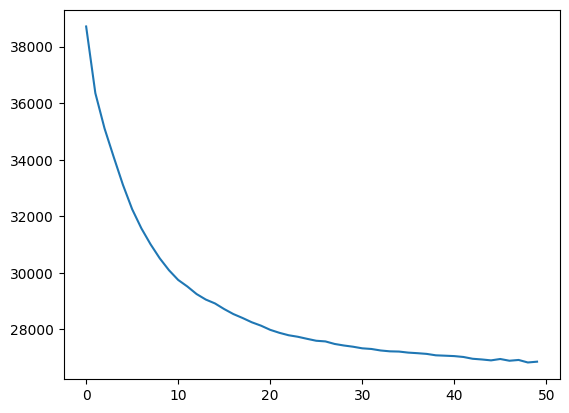

In [164]:
plt.plot(history_alfa.history['val_loss'])

### Model Beta

O modelo Beta possui 2 camadas, sendo a primeira com 22*2=44 perceptrons e a segunda com 22.

In [165]:
model_beta = keras.Sequential(name='Beta')

model_beta.add(layers.Input(shape=(x_train.shape[1], )))
model_beta.add(layers.Dense(22*2, activation='relu'))
model_beta.add(layers.Dense(22, activation='relu'))
model_beta.add(layers.Dense(1))

model_beta.summary()

Model: "Beta"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                │ (None, 44)             │         1,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 22)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,025 (7.91 KB)

 Trainable params: 2,025 (7.91 KB)

 Non-trainable params: 0 (0.00 B)

In [166]:
model_beta.compile(loss='mse')

In [167]:
history_beta = model_beta.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=None)

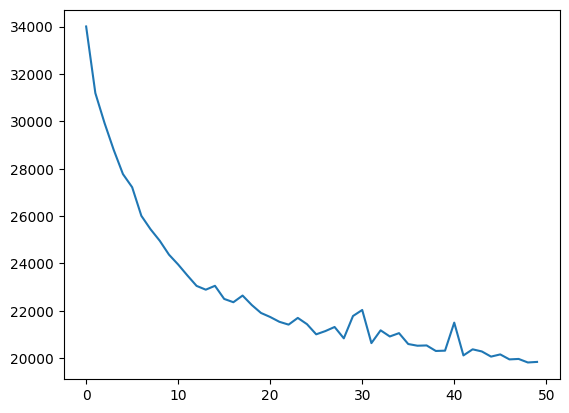

In [168]:
plt.plot(history_beta.history['val_loss'])

### Model Delta

O modelo Delta, possui 4 camadas, formando um funil.

In [169]:
model_delta = keras.Sequential(name='Delta')

model_delta.add(layers.Input(shape=(x_train.shape[1], )))
model_delta.add(layers.Dense(22*8, activation='relu'))
model_delta.add(layers.Dense(22*4, activation='relu'))
model_delta.add(layers.Dense(22*2, activation='relu'))
model_delta.add(layers.Dense(22, activation='relu'))
model_delta.add(layers.Dense(1))

model_delta.summary()

Model: "Delta"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 176)            │         4,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 88)             │        15,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 44)             │         3,916 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 22)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,553 (95.91 KB)

 Trainable params: 24,553 (95.91 KB)

 Non-trainable params: 0 (0.00 B)

In [170]:
model_delta.compile(loss='mse')

In [171]:
history_delta = model_delta.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=None)

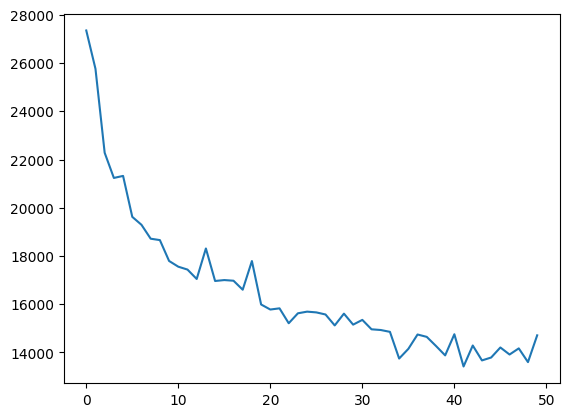

In [172]:
plt.plot(history_delta.history['val_loss'])

#### Model Sigma

O modelo Sigma, possui 22 camadas com 22 perceptrons.

In [173]:
model_sigma = keras.Sequential(name='Delta')

model_sigma.add(layers.Input(shape=(x_train.shape[1], )))
for i in np.arange(22):
    model_sigma.add(layers.Dense(22, activation='relu'))
model_sigma.add(layers.Dense(1))

model_sigma.summary()

Model: "Delta"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_79 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,155 (43.57 KB)

 Trainable params: 11,155 (43.57 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
model_sigma.compile(loss='mse')

In [175]:
history_sigma = model_sigma.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=None)

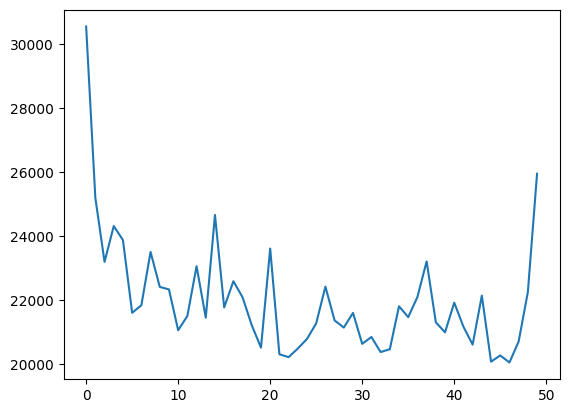

In [176]:
plt.plot(history_sigma.history['val_loss'])